# **1. Importaciones y Dataset**

In [1]:
#Las importaciones necesarias
import numpy as np
import pandas as pd # Estructura y manipulación de datos
import matplotlib.pyplot as plt # Graficos
from matplotlib import style # Si va
import seaborn as sns # diseño de Graficos

#---- Importaciónes de scikit learn ----

from sklearn.preprocessing import MinMaxScaler  # Con esta importacion, podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1
from sklearn.preprocessing import LabelEncoder # Para transformar datos categoricos a formato numerico

from sklearn.linear_model import LinearRegression, Ridge # with this library we can know about classification, regression and clustering problems (linear model etc)
from sklearn.model_selection import train_test_split

#---- Metricas de modelos de regresión ----

from sklearn.metrics import r2_score # solo lo ocuparemos para problemas de regresion o todo lo que sea numerico
from sklearn.metrics import mean_squared_error #solo para la parte numerica, con esto vamos a poder sumar y sacar el promedio del los datos o el error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.Preparacion de los datos**

## Respaldo del dataframe

In [3]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [4]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [5]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [6]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [7]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**

trataremos de trasformar y arreglar variables que no son numericos, cambiar formatos  para poder utilizar despues, para preparar el modelado utilizando scaler

* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [8]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding
El label encoding nos ayudara a transformar los
datos categóricos **Team** y **Map** en un formato numérico como beneficio a posibles modelos de machine learning.

In [9]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [10]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [11]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-11-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


In [12]:
df_backup.RoundHeadshots.unique()

array([0, 1, 2, 3, 4, 5])

- Se realiza una transformacion en los datos que contenga valores de tipo **TRUE** o **FALSE** a valores **numericos** con el proposito de realizar modelos que requieran de estos tipos de datos. Ademas, con esto, ayudara o benecifiar el procesamiento de los datos optimizando la velocidad y eficientiza.

In [13]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [14]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **3.Modelo de Regresion Multiple**

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [15]:
#Sin relacion; PrimaryHeavy,Map,RoundWinner,MatchWinner,Survived

# x = df_backup[['TeamStartingEquipmentValue','RLethalGrenadesThrown']]

x = df_backup[["Map","Team",'TeamStartingEquipmentValue']]
y = df_backup['RoundStartingEquipmentValue']

In [16]:
model = LinearRegression()

model.fit(x, y)

Y_hat = model.predict(x)

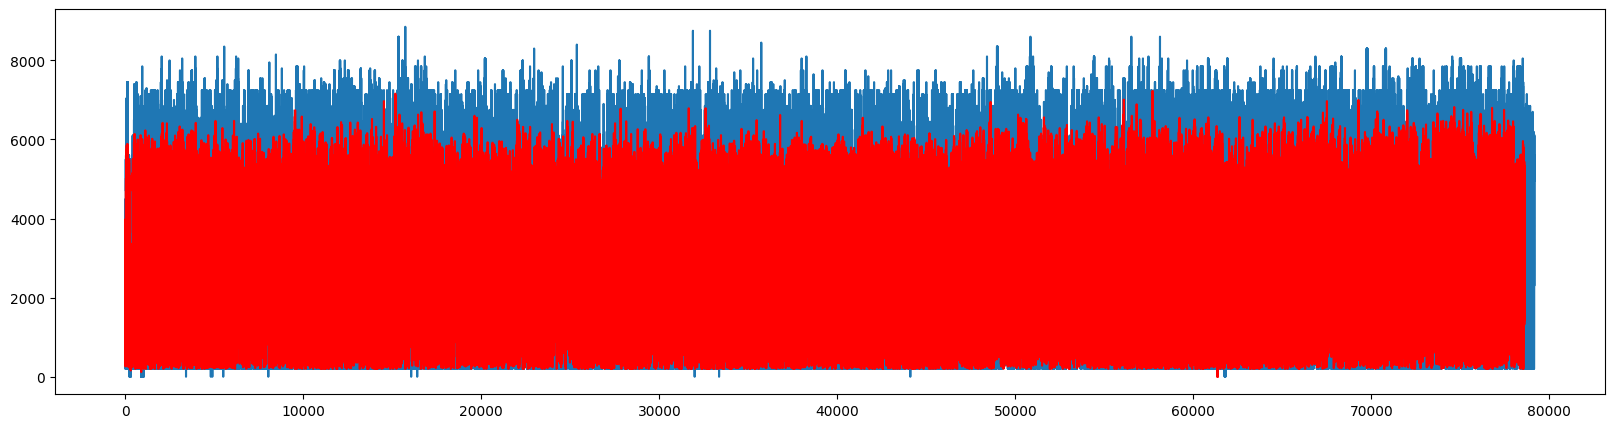

In [17]:
plt.subplots(figsize=(20,5))
plt.plot(y)
plt.plot(Y_hat, 'r')

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3 ,random_state=42)

In [19]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)

LinearRegression()

In [20]:
Y_hat = model.predict(Xtest)

print("Mean squared error",mean_squared_error(Ytest, Y_hat))
print("mean_absolute_error",mean_absolute_error(Ytest, Y_hat))
rmse = np.sqrt(mean_squared_error(Ytest, Y_hat))
print("Root Mean Squared Error:",rmse )
print('Variance score: %.2f',r2_score(Ytest, Y_hat))

Mean squared error 645971.563008051
mean_absolute_error 509.2300514191154
Root Mean Squared Error: 803.7235613120042
Variance score: %.2f 0.8555934387297315


In [21]:
 #GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

ridge_grid.fit(Xtrain, Ytrain)

best_model = ridge_grid.best_estimator_

# Evaluación
Y_hat = best_model.predict(Xtest)
print("Best Params:", ridge_grid.best_params_)
print("MSE:", mean_squared_error(Ytest, Y_hat))
print("MAE:", mean_absolute_error(Ytest, Y_hat))
print("RMSE:", np.sqrt(mean_squared_error(Ytest, Y_hat)))
print(f"R²: {r2_score(Ytest, Y_hat)}")

Best Params: {'alpha': 100, 'fit_intercept': False}
MSE: 645959.5278105901
MAE: 509.24020060781726
RMSE: 803.7160741272941
R²: 0.8555961291910135


# **Resultado del Modelo:**

uso de variable:



* Mean squared error: 645971.563008051
* mean_absolute_error: 509.2300514191154
* Root Mean Squared Error: 803.7235613120042
* R²: 0.8555934387297315



Observacion:
* El modelo presenta un Mean squared error (mse) de 645,972 y un root mean square error (RMSE) de aproximado 804, lo que indica que en promedio las prediciones unos 804 en el valor real. El mean absolute error (509.2) sugiere que los errores absolutos son menores en promedio, lo cual es tipico cuando hay algunos errores grandes que influyen RMSE

Pero el otro lado el R2 : 0.85 muestra que el modelo explica cerca 85.5%  de la variebilidad de los datos, lo cual es un muy buen ajuste




# **Resultado del GridseahCV**
* MSE: 645959.5278105901
* MAE: 509.24020060781726
* RMSE: 803.7160741272941
* R²: 0.8555961291910135

observacion:
* Los resultados tras la optimización con GridSearchCV usando regresión Ridge son prácticamente iguales a los del modelo inicial, lo que indica que el modelo es estable y las variables seleccionadas mantienen un desempeño consistente para predecir el valor inicial del equipo.



